<a href="https://www.kaggle.com/code/kingki19/stock-market-analysis-google?scriptVersionId=179745046" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Practice makes perfect* 

<center> <h1> Stock Market Analysis: Google </h1> </center>

# Initiation

## Libraries and Dataset
Dataset from: [https://www.kaggle.com/datasets/hchsmost/test-dataset/data](https://www.kaggle.com/datasets/hchsmost/test-dataset/data)

In [1]:
# IMPORT IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# INITIATE DATASET
df = pd.read_csv("/kaggle/input/test-dataset/GOOGL.csv")
display(df.head(5))
print(f"Shape of dataframe: {df.shape}")
print(df.info())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044


Shape of dataframe: (4953, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4953 non-null   object 
 1   Open       4953 non-null   float64
 2   High       4953 non-null   float64
 3   Low        4953 non-null   float64
 4   Close      4953 non-null   float64
 5   Adj Close  4953 non-null   float64
 6   Volume     4953 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 271.0+ KB
None


What is happen:
> We miss some days in that dataset. For an example, check dataframe above. We miss 2 days from `2004-08-20` to `2004-08-23`. We gonna try to fill this gap.

> We get dataframe that have `4953` rows and `7` columns.

> The `Date` columns is not in `datetime` type yet. 

## Preprocessing the data before analysis
1. Change `Date` columns to `datetime` type and set it as index in dataframe
2. fill missing date using `interpolation` method

In [2]:
def fill_missing_date(df):
    # Create a copy so it doesn't changes the original dataframe
    df_copy = df.copy()
    
    # Create full date range from start to last date
    full_dates = pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='D')
    
    # Using reindex to make sure all date was exist
    df_reindexed = df.reindex(full_dates)
    
    # Fill the gap with interpolation linear method
    df_interpolated = df_reindexed.interpolate(method='linear')
    
    return df_interpolated

In [3]:
# Create a copy so it doesn't change the original dataframe
df_copy = df.copy()
# Change type in 'Date' columsn to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
# Set index from 'Date' columns
df_copy = df_copy.set_index('Date')
# Apply the function
df_filled = fill_missing_date(df_copy)
display(df_filled.head(5))
print(f"Shape of dataframe: {df_filled.shape}")
print(df_filled.info())

,Open,High,Low,Close,Adj Close,Volume
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924.0
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856.0
2004-08-21,2.609026,2.766433,2.586336,2.719553,2.719553,426165408.0
2004-08-22,2.690274,2.803137,2.657658,2.728645,2.728645,395643960.0
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512.0


Shape of dataframe: (7188, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7188 entries, 2004-08-19 to 2024-04-23
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7188 non-null   float64
 1   High       7188 non-null   float64
 2   Low        7188 non-null   float64
 3   Close      7188 non-null   float64
 4   Adj Close  7188 non-null   float64
 5   Volume     7188 non-null   float64
dtypes: float64(6)
memory usage: 393.1 KB
None


What is happen:
> We have set `Date` columns into `datetime` type and make it as index.

> We have fill the missing dates. From `4953` rows to `7188` rows.

# What are those columns?
I never touch stock market (i am noob and poor btw 🥺) and don't understand what are those columns mean. I have asked LLM (chatGPT) to give me insight and here's his explanation:

1. **Open**: This is the price at which a stock or asset opens for trading during a specific period, typically at the beginning of a trading session or day.

2. **High**: This represents the highest price at which a stock or asset traded during the given period, such as a day, week, month, etc.

3. **Low**: The low price is the opposite of the high price. It indicates the lowest price at which a stock or asset traded during the specified period.

4. **Close**: This is the final price at which a stock or asset traded during the period, typically at the end of a trading session or day.

5. **Adj Close** (Adjusted Close): The adjusted close price reflects any corporate actions or events that impact the stock's price, such as dividends, stock splits, or mergers. It is adjusted to account for these factors, providing a more accurate representation of the stock's performance over time.

6. **Volume**: Volume refers to the total number of shares or contracts traded during a specific period. It indicates the level of market activity or liquidity for a particular stock or asset.

# Correlation

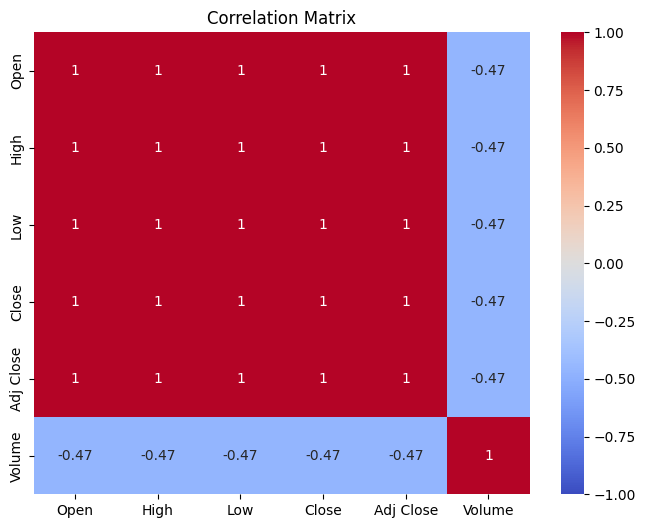

In [4]:
# Calculate correlation for each columns
correlation_matrix = df_filled.corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

What does it mean?
> All columns have very strong positive correlation, except for `Volume` column.

> `Volume` column has weak negative correlation. That means if other goes up, it goes down.

# Plot

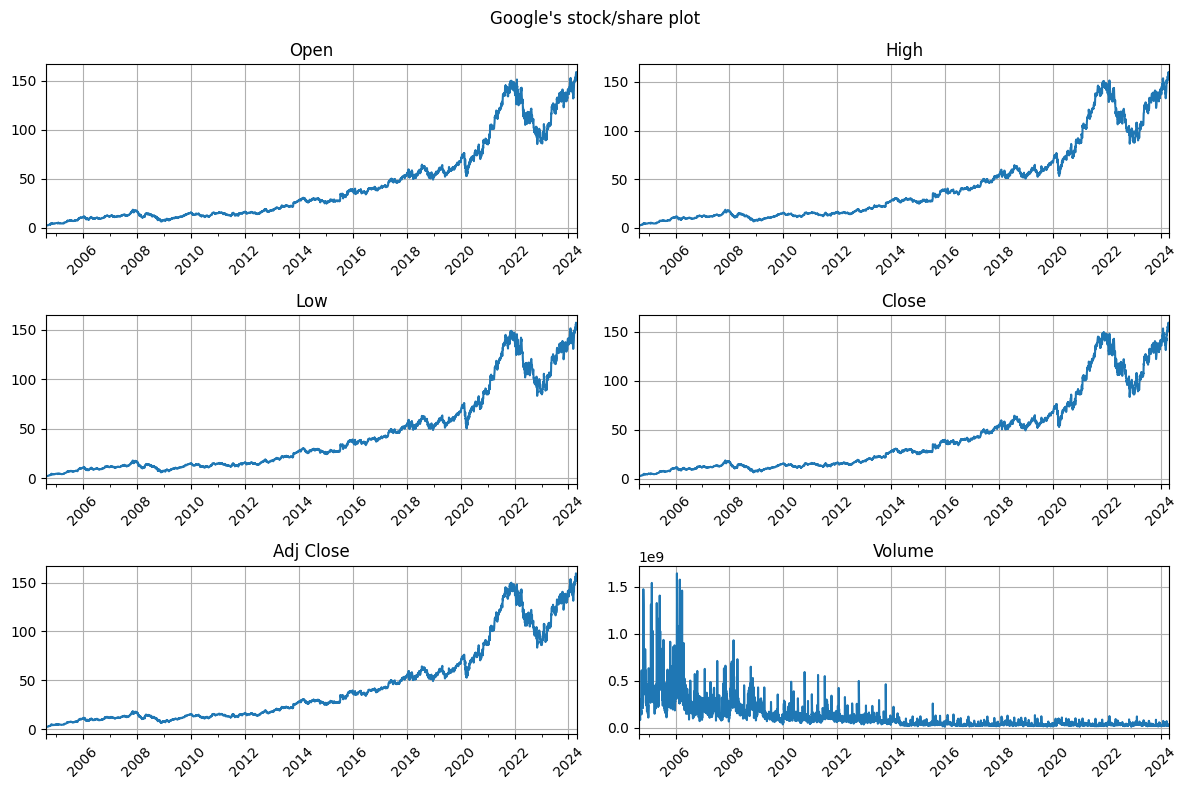

In [5]:
# Create a subplot for each column in the DataFrame
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))  # 2 baris, 3 kolom

for i, column in enumerate(df_filled.columns):  # Start from the second column
    row = i // 2  # Division without remainder for rows
    col = i % 2  # Remaining division for columns
    df_filled[column].plot(ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True)
    
fig.suptitle("Google's stock/share plot")
plt.tight_layout()
plt.show()

My opinion (analysis):
- Less people wanna buy or sell their Google's stock in the last 8 year (from 2014) when the stock price (seems) reach 40 USD. Because in `Volume` plot show less transaction volume after 2014 compared to before 2014.
- Something is happening that make Google stock price:
    - Rising up from 2020 to 2022. 
    - Falling down from 2022 to 2023. 
    - And rising up again from 2023 to 2024.
    
  But i don't know what is happening in those years. I never follow stock market news. 🤕  
  I think it's not correlated to their stock transaction volume and need further research to create stock sentiment analysis.

# Clean Plot

<Axes: >

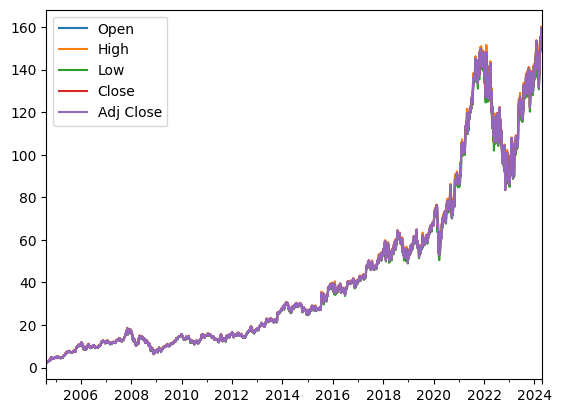

In [6]:
df_stock_price = df_filled[['Open','High', 'Low', 'Close', 'Adj Close']]
df_stock_price.plot()

<Axes: >

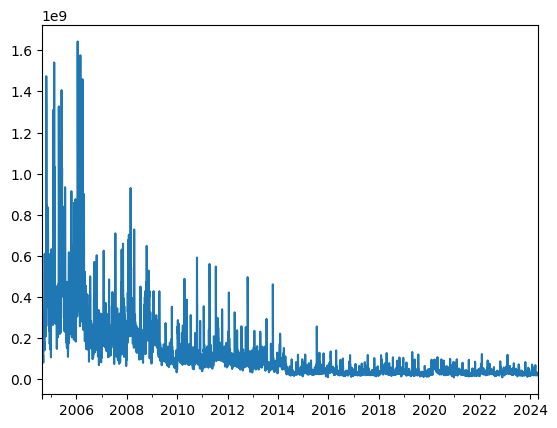

In [7]:
df_filled['Volume'].plot()

# Lag Correlation Analysis

In [8]:
df_lagged = df_filled.copy()
df_lagged['lag_7'] = df_lagged['Close'].shift(7)
df_lagged['lag_30'] = df_lagged['Close'].shift(30)
df_lagged['lag_365'] = df_lagged['Close'].shift(365)
df_lagged_corr = df_lagged[['Close', 'lag_7', 'lag_30', 'lag_365']]
df_lagged_corr = df_lagged_corr.copy().dropna()

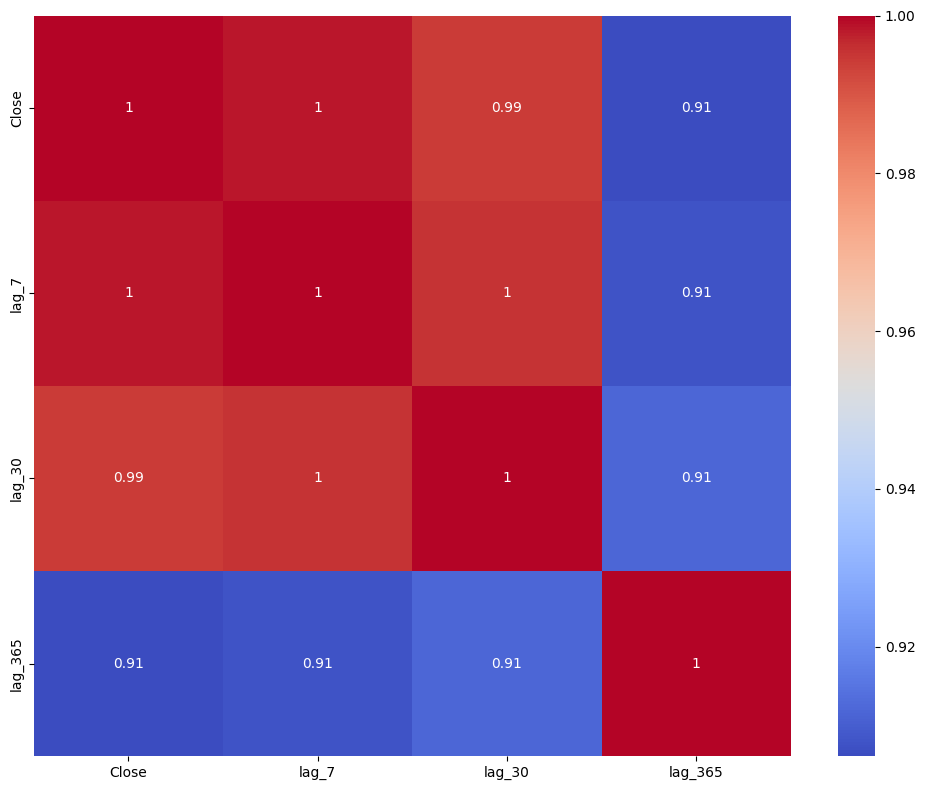

In [9]:
# Calculate correlation matrix
correlation_matrix = df_lagged_corr.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

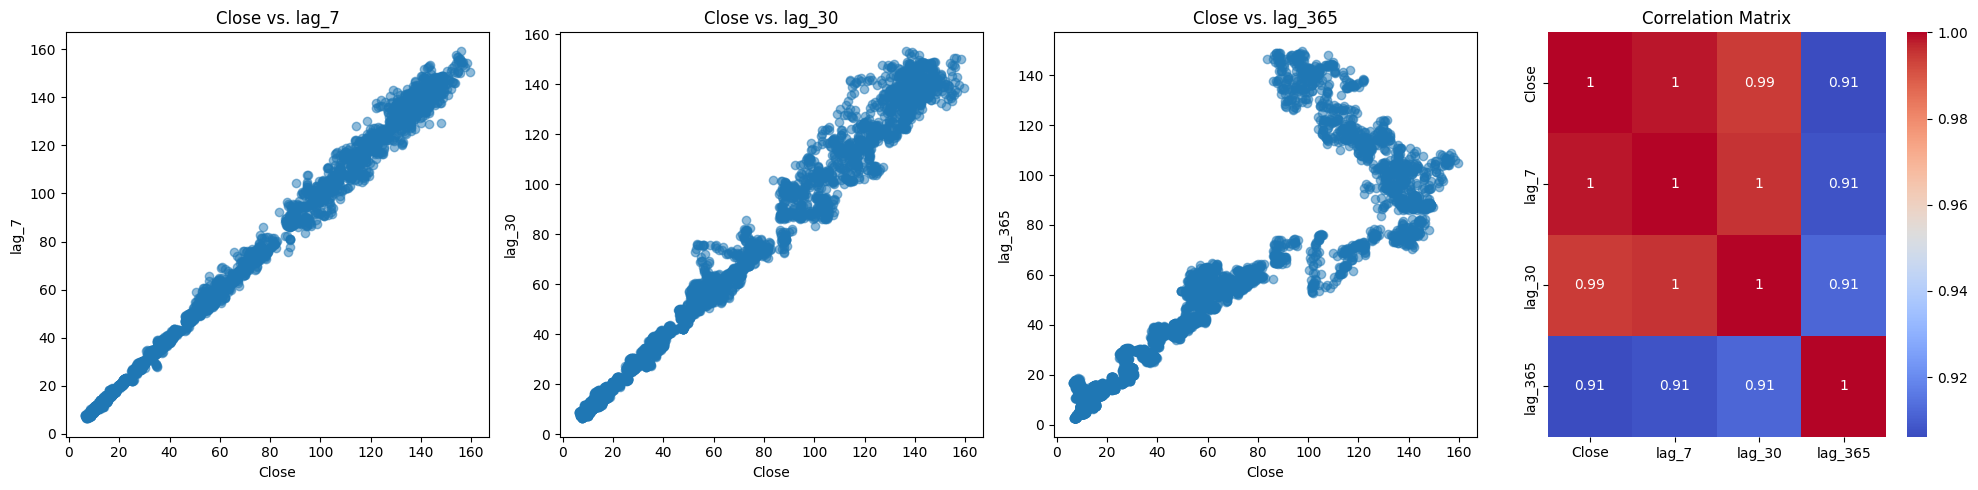

In [10]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 3 columns

# Scatter plot for lag_7
axes[0].scatter(df_lagged_corr['Close'], df_lagged_corr['lag_7'], alpha=0.5)
axes[0].set_title('Close vs. lag_7')
axes[0].set_xlabel('Close')
axes[0].set_ylabel('lag_7')

# Scatter plot for lag_30
axes[1].scatter(df_lagged_corr['Close'], df_lagged_corr['lag_30'], alpha=0.5)
axes[1].set_title('Close vs. lag_30')
axes[1].set_xlabel('Close')
axes[1].set_ylabel('lag_30')

# Scatter plot for lag_365
axes[2].scatter(df_lagged_corr['Close'], df_lagged_corr['lag_365'], alpha=0.5)
axes[2].set_title('Close vs. lag_365')
axes[2].set_xlabel('Close')
axes[2].set_ylabel('lag_365')

# Calculate correlation matrix
correlation_matrix = df_lagged_corr.corr()

# Visualize the correlation matrix in the fourth subplot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[3])
axes[3].set_title('Correlation Matrix')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Seasonal analysis

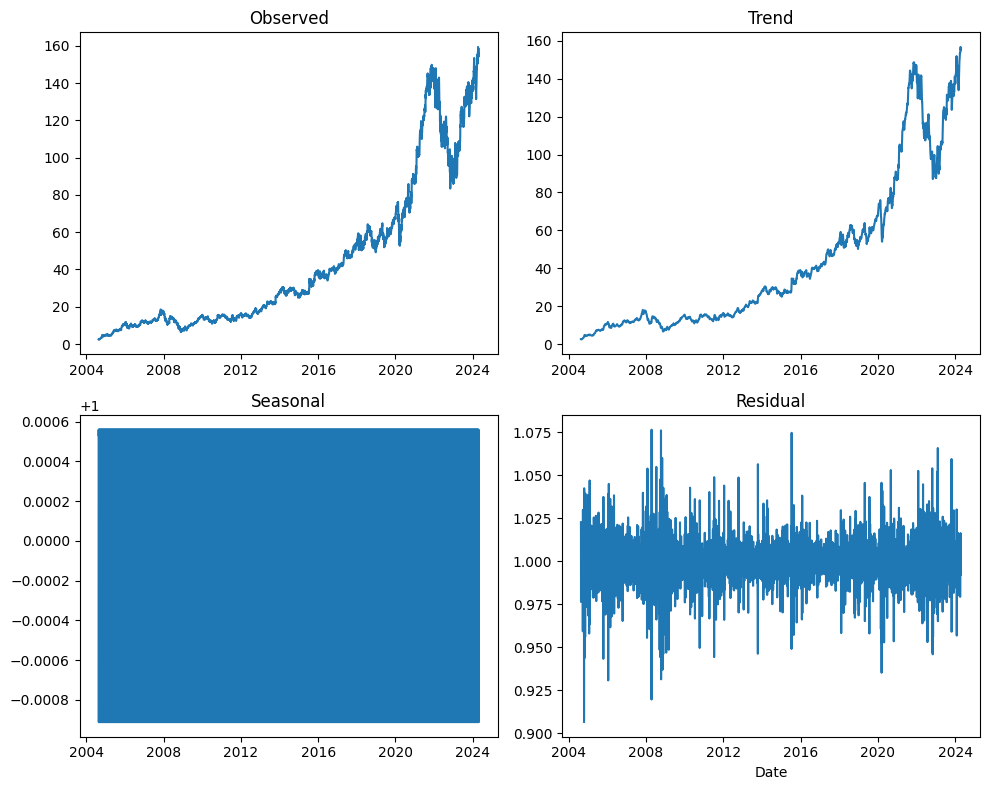

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_filled['Close'], model='multiplicative')

# Plot the decomposed components in 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1, ax2 = axes[0]  # Access first row elements
ax3, ax4 = axes[1]  # Access second row elements

ax1.plot(decomposition.observed)
ax1.set_title('Observed')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

# Ensure all subplots share the same x-axis
plt.subplots_adjust(bottom=0.1)  # Adjust bottom margin to avoid overlapping labels
plt.xlabel('Date')
plt.tight_layout()
plt.show()

> It doesn't have trend.

# Technical Analysis

## Moving Average



<Axes: >

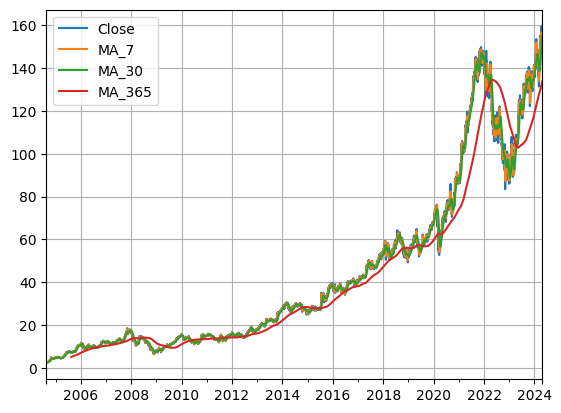

In [12]:
df_ma = df_filled.copy()
windows_ma = [7, 30, 365]

for ma in windows_ma:
    df_ma[f"MA_{ma}"] = df_ma["Close"].rolling(window=ma).mean()

target = ['Close', 'MA_7', 'MA_30', 'MA_365']
df_ma[target].plot(grid=True)

## Upper below bollinger band

<Axes: >

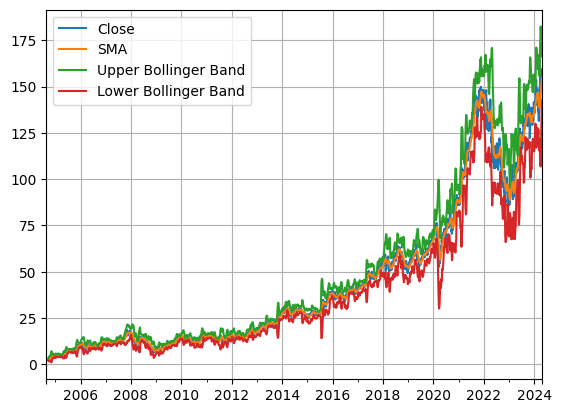

In [13]:
# Convert data to a pandas DataFrame
df = df_filled.copy()

# Define window sizes
window_sma = 30  # Window size for moving average
window_rsi = 30  # Window size for RSI
multiplier_bollinger = 5  # Multiplier for Bollinger Bands

# Calculate Simple Moving Average (SMA)
df["SMA"] = df["Close"].rolling(window=window_sma).mean()

# Calculate Average Gain and Average Loss for RSI
def calculate_avg_gain_loss(data, window):
    avg_gain = np.zeros(len(data))
    avg_loss = np.zeros(len(data))
    for i in range(window, len(data)):
        price_diff = data["Close"].iloc[i] - data["Close"].iloc[i-window]
        avg_gain[i] = max(price_diff, 0) if avg_gain[i-1] > 0 else avg_gain[i-1] + max(price_diff, 0)
        avg_loss[i] = abs(min(price_diff, 0)) if avg_loss[i-1] > 0 else avg_loss[i-1] + abs(min(price_diff, 0))
    return avg_gain, avg_loss

avg_gain, avg_loss = calculate_avg_gain_loss(df, window_rsi)

# Calculate RSI
df["RSI"] = 100 - (100 / (1 + avg_gain / (avg_loss + 1e-7)))  # Avoid division by zero

# Calculate Bollinger Bands
df["Upper Bollinger Band"] = df["SMA"] + multiplier_bollinger * df["Close"].rolling(window=window_sma).std()
df["Lower Bollinger Band"] = df["SMA"] - multiplier_bollinger * df["Close"].rolling(window=window_sma).std()

df[['Close', 'SMA', "Upper Bollinger Band", "Lower Bollinger Band"]].plot(grid=True)
# import plotly.express as px

# # Assuming your DataFrame is named 'df'

# fig = px.line(
#     df,  # Data source (DataFrame)
#     x=df.index,  # x-axis (assuming the index is DatetimeIndex)
#     y=[
#         'Close',  # Price line
#         'SMA', 'RSI', 'Upper Bollinger Band', 'Lower Bollinger Band'  # Technical indicators
#     ],
#     title='Stock Price with Technical Indicators',
#     labels={
#         'index': 'Date',  # Customize x-axis label
#         'value': 'Price'  # Customize y-axis label (default for price line)
#     }
# )

# # Customize line colors and appearances (optional)
# fig.update_traces(
#     { 'line':{'color':'blue'} },  # Set line color for price
#     selector={'name':'Close'}  # Apply to 'Close' line only
# )

# # Display the plot
# fig.show()

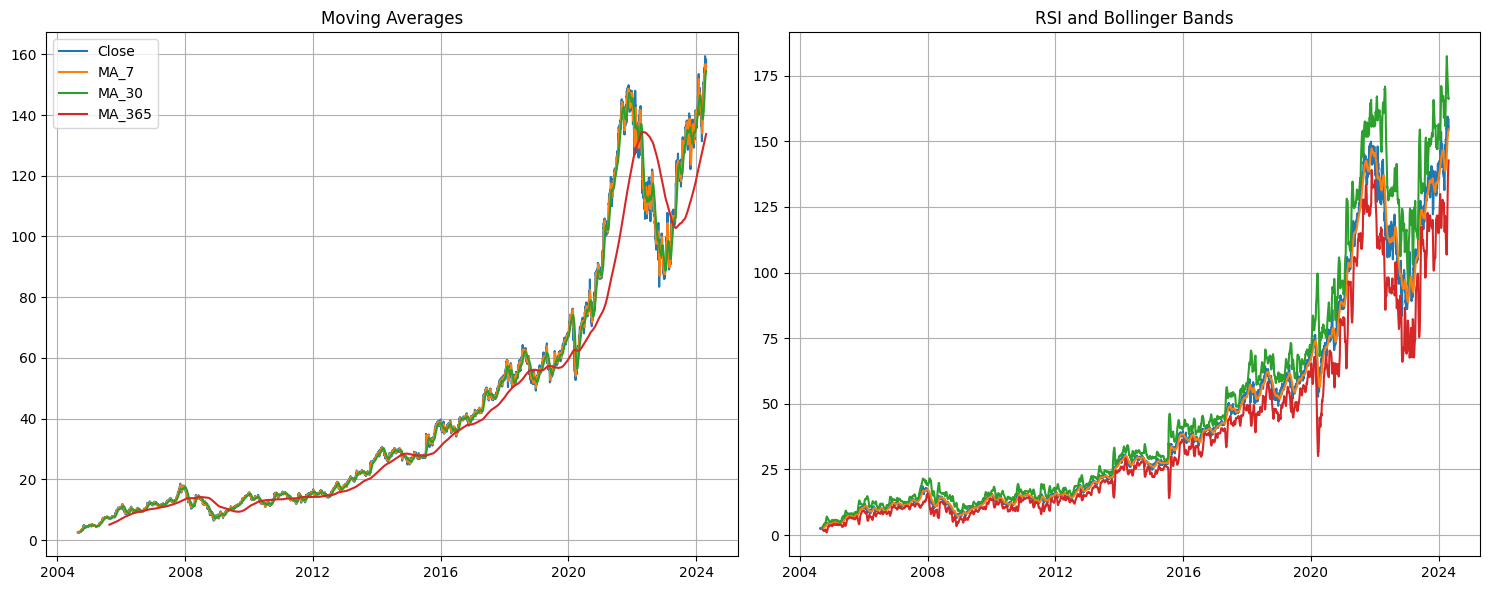

In [14]:
def calculate_avg_gain_loss(data, window):
    avg_gain = np.zeros(len(data))
    avg_loss = np.zeros(len(data))
    for i in range(window, len(data)):
        price_diff = data["Close"].iloc[i] - data["Close"].iloc[i-window]
        avg_gain[i] = max(price_diff, 0) if avg_gain[i-1] > 0 else avg_gain[i-1] + max(price_diff, 0)
        avg_loss[i] = abs(min(price_diff, 0)) if avg_loss[i-1] > 0 else avg_loss[i-1] + abs(min(price_diff, 0))
    return avg_gain, avg_loss

# Assuming df_filled is your DataFrame

# **Calculate Moving Averages before Plotting**
windows_ma = [7, 30, 365]
df_ma = df_filled.copy()
for ma in windows_ma:
    df_ma[f"MA_{ma}"] = df_ma["Close"].rolling(window=ma).mean()

target = ['Close', *(f"MA_{ma}" for ma in windows_ma)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Create a figure with 2 subplots

ax1.plot(df_filled.index, df_ma[target], label=target)  # Plot on ax1

ax1.set_title('Moving Averages')
ax1.legend()
ax1.grid(True)

# Plot RSI and Bollinger Bands
df = df_filled.copy()

window_sma = 30  # Window size for moving average
window_rsi = 30  # Window size for RSI
multiplier_bollinger = 5  # Multiplier for Bollinger Bands

# Calculate Simple Moving Average (SMA)
df["SMA"] = df["Close"].rolling(window=window_sma).mean()

# Calculate RSI
avg_gain, avg_loss = calculate_avg_gain_loss(df, window_rsi)
df["RSI"] = 100 - (100 / (1 + avg_gain / (avg_loss + 1e-7)))

# Calculate Bollinger Bands
df["Upper Bollinger Band"] = df["SMA"] + multiplier_bollinger * df["Close"].rolling(window=window_sma).std()
df["Lower Bollinger Band"] = df["SMA"] - multiplier_bollinger * df["Close"].rolling(window=window_sma).std()

target = ['Close', 'SMA', 'Upper Bollinger Band', 'Lower Bollinger Band']
ax2.plot(df_filled.index, df[target])  # Plot on ax2

ax2.set_title('RSI and Bollinger Bands')
ax2.grid(True)

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots

plt.show()

# Modelling

## 30 Days predict

2024-05-25 19:21:27.050702: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 19:21:27.050820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 19:21:27.181928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0120 - val_loss: 2.8875e-04
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1405e-04 - val_loss: 2.2593e-04
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4258e-04 - val_loss: 1.8007e-04
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9459e-04 - val_loss: 1.9503e-04
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8075e-04 - val_loss: 1.3777e-04
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4877e-04 - val_loss: 1.1196e-04
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4232e-04 - val_loss: 1.4809e-04
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6296e-04 - val_loss: 2.0001e-04
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4558e-04 - val_loss: 9.0559e-05
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2286e-04 - val_loss: 2.2388e-04
Epoch 11/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6107e-04 - 

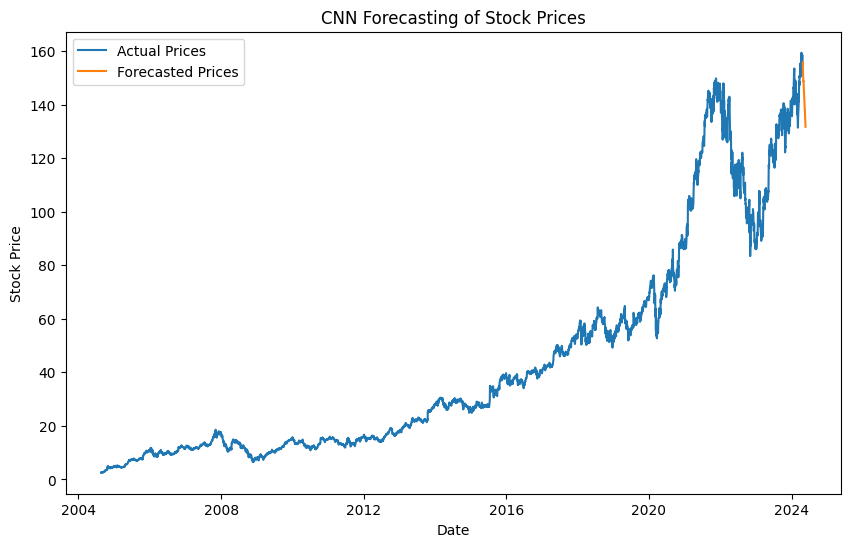

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Assuming df_stock_price contains 'Close' prices
# Prepare data
data = df_stock_price['Close'].values.reshape(-1, 1)

# Create sequences and labels for the CNN model
seq_length = 30  # Number of days to consider for each input sequence
X = []
y = []
for i in range(seq_length, len(data)):
    X.append(data[i - seq_length:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape data for CNN input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize data between 0 and 1
scaled_data = scaler.fit_transform(data)

# Create sequences and labels using scaled data
scaled_X = []
scaled_y = []
for i in range(seq_length, len(scaled_data)):
    scaled_X.append(scaled_data[i - seq_length:i, 0])
    scaled_y.append(scaled_data[i, 0])
scaled_X, scaled_y = np.array(scaled_X), np.array(scaled_y)

# Reshape scaled data for CNN input
scaled_X = np.reshape(scaled_X, (scaled_X.shape[0], scaled_X.shape[1], 1))

# Split data into training and testing sets (using scaled data)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model menggunakan metrik MSE dan MAE pada data uji
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Forecasting
last_sequence = scaled_data[-seq_length:].reshape((1, seq_length, 1))
forecast = []
for _ in range(30):  # Forecasting for the next 30 days
    next_pred = model.predict(last_sequence)
    # Invert scaling for predicted values
    forecast.append(scaler.inverse_transform(next_pred)[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Create a DataFrame for the forecasted prices
forecast_dates = pd.date_range(start=df_stock_price.index[-1], periods=31, freq='D')[1:]  # Assuming daily frequency
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot the forecasted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_stock_price.index, df_stock_price['Close'], label='Actual Prices')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('CNN Forecasting of Stock Prices')
plt.legend()
plt.show()


## 60 days predict

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0077 - val_loss: 2.7732e-04
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6987e-04 - val_loss: 2.0243e-04
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0611e-04 - val_loss: 1.7714e-04
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8762e-04 - val_loss: 1.8168e-04
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5285e-04 - val_loss: 2.0211e-04
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7863e-04 - val_loss: 1.5373e-04
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3838e-04 - val_loss: 1.1815e-04
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1319e-04 - val_loss: 9.7158e-05
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7523e-05 - val_loss: 7.7901e-05
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1909e-05 - val_loss: 6.7739e-05
Epoch 11/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3850e-05 - 

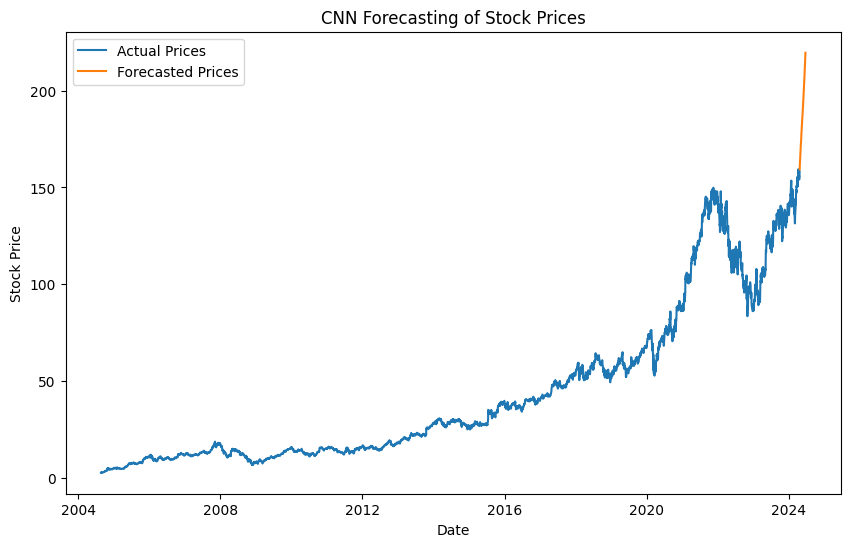

Training Loss: 5.810672519146465e-05, Testing Loss: 5.460877946461551e-05


In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Assuming df_stock_price contains 'Close' prices
# Prepare data
data = df_stock_price['Close'].values.reshape(-1, 1)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize data between 0 and 1
scaled_data = scaler.fit_transform(data)

# Create sequences and labels for the CNN model
seq_length = 30  # Number of days to consider for each input sequence
X = []
y = []
for i in range(seq_length, len(scaled_data)):
    X.append(scaled_data[i - seq_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape data for CNN input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Forecasting
last_sequence = scaled_data[-seq_length:].reshape((1, seq_length, 1))
forecast = []
for _ in range(60):  # Forecasting for the next 60 days
    next_pred = model.predict(last_sequence)
    # Invert scaling for predicted values
    forecast.append(scaler.inverse_transform(next_pred)[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Create a DataFrame for the forecasted prices
forecast_dates = pd.date_range(start=df_stock_price.index[-1], periods=61, freq='D')[1:]  # Assuming daily frequency
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot the forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(df_stock_price.index, df_stock_price['Close'], label='Actual Prices')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('CNN Forecasting of Stock Prices')
plt.legend()
plt.show()

# Evaluate model accuracy
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Training Loss: {train_loss}, Testing Loss: {test_loss}")


## 90 days prediction

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 440.4064 - val_loss: 7.3834
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3671 - val_loss: 6.9472
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5057 - val_loss: 7.3530
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4165 - val_loss: 6.4339
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8199 - val_loss: 5.7145
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7865 - val_loss: 7.0899
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6200 - val_loss: 4.6990
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0529 - val_loss: 4.6605
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8203 - val_loss: 4.5115
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3857 - val_loss: 3.6707
Epoch 11/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4182 - val_loss: 3.2808
Epoch 12/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

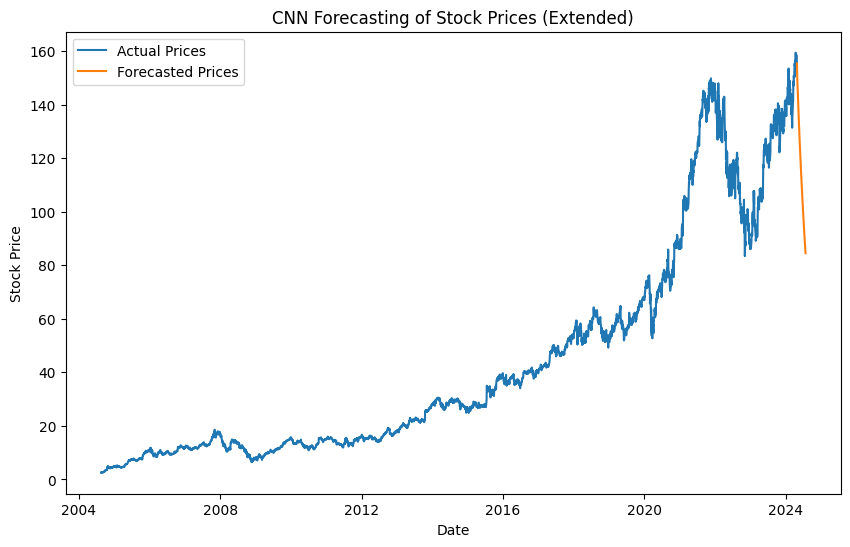

In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error  # Perbaikan: Mengimpor mean_absolute_error
import matplotlib.pyplot as plt

# Asumsikan df_stock_price mengandung harga 'Close'
# Mempersiapkan data
data = df_stock_price['Close'].values.reshape(-1, 1)

# Membuat urutan dan label untuk model CNN
seq_length = 30  # Jumlah hari yang dipertimbangkan untuk setiap urutan input
X = []
y = []
for i in range(seq_length, len(data)):
    X.append(data[i - seq_length:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)

# Mengubah bentuk data untuk input CNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Lapisan output

model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Memprediksi dengan model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Peramalan
last_sequence = data[-seq_length:].reshape((1, seq_length, 1))
forecast = []
days_predict = 90
for _ in range(days_predict):  # Meramalkan untuk 90 hari ke depan
    next_pred = model.predict(last_sequence)
    forecast.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Membuat DataFrame untuk harga yang diprediksi
forecast_dates = pd.date_range(start=df_stock_price.index[-1], periods=days_predict+1, freq='D')[1:]  # Asumsikan frekuensi harian selama 91 hari
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot harga yang diprediksi
plt.figure(figsize=(10, 6))
plt.plot(df_stock_price.index, df_stock_price['Close'], label='Actual Prices')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('CNN Forecasting of Stock Prices (Extended)')
plt.legend()
plt.show()


# Further Research
I don't have time to research all possibilities to do analysis on Google Stock Price dataset, because no one paid me 😭 and i still has main task to finish project in my collages. If i **remember**, i will add more analysis on this notebook. :)  
You also can help me too with copy this notebook and do your own analysis (or help me finish it).

- [ ] **Using start date from year 2014**: because there's no high volume stock transaction after 2014 (compare to before 2014).
- [ ] **Lag features analysis**: does it current time it's correlated to past time.
- [ ] **Regression Analysis & Prediction**: Try a simple Linear Regression for time-series analysis.
- [ ] **Volatility Analysis**: Use measures like standard deviation or Bollinger Bands to analyze the volatility of the stock prices.
- [ ] **Technical Analysis**: create a strategies using Moving Average and Relative Strength Index (RSI)
- [ ] **Seasonal Decompositon Analysis**: using `seasonal decompose` from sklearn and doing analysis from trend, seasonal, and residu from those data.
- [ ] **Create advance time-series modern model**: Using spesific modern model (neural network) like LTSM, CNN, FNN, and so on to create horizon prediction of stock price.
- [ ] **Add more sentiment data and doing sentiment stock analysis**: To add more feature in modelling. I won't do this. 😓